In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(x, scores, figure_file):
    running_avg = np.zeros(len(scores))
    for i in range(len(running_avg)):
        running_avg[i] = np.mean(scores[max(0, i-100):(i+1)])
    plt.plot(x, running_avg)
    plt.title('Running average of previous 100 scores')
    plt.savefig(figure_file)

In [2]:
import gym
import numpy as np
from ppo_agent import *
import time
from torch.utils.tensorboard import SummaryWriter


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/__init__.py:2: DeprecationWarning: The distutils package is deprecated and slated for removal in Python 3.12. Use setuptools or check PEP 632 for potential alternatives
  from distutils.version import LooseVersion


episode 0 score 13.0 avg score 13.0 time_steps 13 learning_steps 0
episode 1 score 10.0 avg score 11.5 time_steps 23 learning_steps 1
episode 2 score 11.0 avg score 11.3 time_steps 34 learning_steps 1
episode 3 score 30.0 avg score 16.0 time_steps 64 learning_steps 3
episode 4 score 15.0 avg score 15.8 time_steps 79 learning_steps 3
episode 5 score 11.0 avg score 15.0 time_steps 90 learning_steps 4
episode 6 score 14.0 avg score 14.9 time_steps 104 learning_steps 5
episode 7 score 17.0 avg score 15.1 time_steps 121 learning_steps 6
episode 8 score 12.0 avg score 14.8 time_steps 133 learning_steps 6
episode 9 score 9.0 avg score 14.2 time_steps 142 learning_steps 7
episode 10 score 12.0 avg score 14.0 time_steps 154 learning_steps 7
episode 11 score 22.0 avg score 14.7 time_steps 176 learning_steps 8
episode 12 score 25.0 avg score 15.5 time_steps 201 learning_steps 10
episode 13 score 10.0 avg score 15.1 time_steps 211 learning_steps 10
episode 14 score 28.0 avg score 15.9 time_steps 2

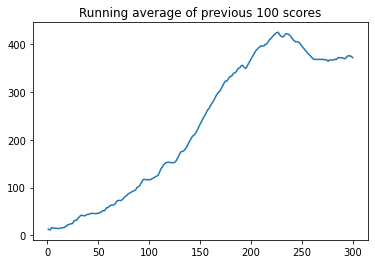

In [21]:
env = gym.make('CartPole-v1')
# env=gym.make('MountainCar-v0')
N = 20
batch_size = 5
n_epochs = 4
alpha = 0.0003
agent = PpoAgent(n_actions=env.action_space.n, batch_size=batch_size, 
                alpha=alpha, n_epochs=n_epochs, 
                input_dims=env.observation_space.shape)
n_games = 300
WRITER=SummaryWriter('runs/PPO_'+str(time.strftime("%H_%M_%S",time.localtime())))
figure_file = 'plots/cartpole.png'

best_score = env.reward_range[0]
score_history = []

learn_iters = 0
avg_score = 0
n_steps = 0

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    WRITER.add_histogram("actor_layer_0", agent.actor.actor[0].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("actor_layer_1", agent.actor.actor[2].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("actor_layer_2", agent.actor.actor[4].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("critic_layer_0", agent.critic.critic[0].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("critic_layer_1", agent.critic.critic[2].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("critic_layer_2", agent.critic.critic[4].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_scalar("actor_loss", agent.actor_loss, i)
    WRITER.add_scalar("critic_loss", agent.critic_loss, i)
    WRITER.add_scalar("total_loss", agent.total_loss, i)
    while not done:
        action, prob, val = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        n_steps += 1
        score += reward
        agent.remember(observation, action, prob, val, reward, done)
        if n_steps % N == 0:
            agent.learn()
            learn_iters += 1
        observation = observation_
    score_history.append(score)
    WRITER.add_scalar("score", score, i)
    avg_score = np.mean(score_history[-100:])

    # if avg_score > best_score:
    #     best_score = avg_score
    #     agent.save_models()

    print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
            'time_steps', n_steps, 'learning_steps', learn_iters)
x = [i+1 for i in range(len(score_history))]
plot_learning_curve(x, score_history, figure_file)

In [4]:
from torchinfo import summary
summary(agent.actor,input_dims=env.observation_space.shape)

Layer (type:depth-idx)                   Param #
ActorNetwork                             --
├─Sequential: 1-1                        --
│    └─Linear: 2-1                       1,280
│    └─ReLU: 2-2                         --
│    └─Linear: 2-3                       65,792
│    └─ReLU: 2-4                         --
│    └─Linear: 2-5                       514
│    └─Softmax: 2-6                      --
Total params: 67,586
Trainable params: 67,586
Non-trainable params: 0

In [5]:
from fileData import *
from netEnv import *
import time
import matplotlib.pyplot as plt



code_path = "../../"
requiredFields = ['FileCount', 'AvgFileSize', 'BufSize', 'Bandwidth', 'AvgRtt', 'CC_Level', 'P_Level', 'PP_Level',
                  'numActiveCores', 'frequency', 'TotalAvgTput', 'TotalEnergy', 'DataTransferEnergy']
LabelName = 'TotalAvgTput'
fileData_chameleon = ReadFile(code_path + '/Dataset/Chameleon_Combined_all.csv', requiredFields)
filedata_grouped_df = fileData_chameleon.get_grouped_df()
filedata_keys=[key for key, _ in filedata_grouped_df]
print(filedata_keys)
print(len(filedata_keys))

[(32, 34.9238114, 40, 10, 30), (32, 34.9238114, 40, 10, 40), (32, 34.9238114, 40, 10, 50), (32, 222.6392977, 40, 10, 30), (32, 222.6392977, 40, 10, 40), (32, 222.6392977, 40, 10, 50), (32, 222.6392977, 40, 10, 60), (32, 222.64, 40, 10, 30), (32, 222.64, 40, 10, 40), (32, 222.64, 40, 10, 50), (32, 222.64, 40, 10, 60), (32, 222.64, 40, 10, 70), (32, 222.64, 40, 10, 80), (32, 222.64, 40, 10, 90), (64, 222.6343047, 40, 10, 30), (64, 222.6343047, 40, 10, 40), (64, 222.6343047, 40, 10, 60), (128, 222.7841896, 40, 10, 30), (128, 222.7841896, 40, 10, 40), (250, 2.410113346, 40, 10, 30), (250, 2.410113346, 40, 10, 40), (250, 2.410113346, 40, 10, 50), (250, 2.410113346, 40, 10, 60), (250, 2.410113346, 40, 10, 70), (250, 2.410113346, 40, 10, 80), (250, 2.410113346, 40, 10, 90), (500, 0.098544573, 40, 10, 30), (500, 0.098544573, 40, 10, 40), (500, 100.91, 40, 10, 30), (500, 100.91, 40, 10, 40), (500, 100.91, 40, 10, 50), (500, 100.91, 40, 10, 70), (500, 100.91, 40, 10, 80), (500, 100.91, 40, 10, 9

8
9
#################


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 0 score 76.8 avg score 76.8 time_steps 100 learning_steps 5


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 1 score 76.6 avg score 76.7 time_steps 200 learning_steps 10


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 2 score 76.6 avg score 76.6 time_steps 300 learning_steps 15


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 3 score 76.6 avg score 76.6 time_steps 400 learning_steps 20


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 4 score 76.6 avg score 76.6 time_steps 500 learning_steps 25


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 5 score 76.6 avg score 76.6 time_steps 600 learning_steps 30


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 6 score 76.6 avg score 76.6 time_steps 700 learning_steps 35


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 7 score 76.6 avg score 76.6 time_steps 800 learning_steps 40


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 8 score 76.6 avg score 76.6 time_steps 900 learning_steps 45


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 9 score 76.6 avg score 76.6 time_steps 1000 learning_steps 50


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 10 score 76.6 avg score 76.6 time_steps 1100 learning_steps 55


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 11 score 76.6 avg score 76.6 time_steps 1200 learning_steps 60


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 12 score 76.6 avg score 76.6 time_steps 1300 learning_steps 65


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 13 score 76.6 avg score 76.6 time_steps 1400 learning_steps 70


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 14 score 76.6 avg score 76.6 time_steps 1500 learning_steps 75


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 15 score 76.6 avg score 76.6 time_steps 1600 learning_steps 80


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 16 score 76.6 avg score 76.6 time_steps 1700 learning_steps 85


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 17 score 76.6 avg score 76.6 time_steps 1800 learning_steps 90


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 18 score 76.6 avg score 76.6 time_steps 1900 learning_steps 95


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 19 score 76.6 avg score 76.6 time_steps 2000 learning_steps 100


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 20 score 76.6 avg score 76.6 time_steps 2100 learning_steps 105


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 21 score 76.6 avg score 76.6 time_steps 2200 learning_steps 110


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 22 score 76.6 avg score 76.6 time_steps 2300 learning_steps 115


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 23 score 76.6 avg score 76.6 time_steps 2400 learning_steps 120


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 24 score 76.6 avg score 76.6 time_steps 2500 learning_steps 125


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 25 score 76.6 avg score 76.6 time_steps 2600 learning_steps 130


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 26 score 76.6 avg score 76.6 time_steps 2700 learning_steps 135


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 27 score 76.6 avg score 76.6 time_steps 2800 learning_steps 140


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 28 score 76.6 avg score 76.6 time_steps 2900 learning_steps 145


/home/hjamil/venv/lib/python3.10/site-packages/torch/utils/tensorboard/summary.py:344: DeprecationWarning: using `dtype=` in comparisons is only useful for `dtype=object` (and will do nothing for bool). This operation will fail in the future.
  cum_counts = np.cumsum(np.greater(counts, 0, dtype=np.int32))


episode 29 score 76.6 avg score 76.6 time_steps 3000 learning_steps 150
training up time is 18.55879783630371 seconds


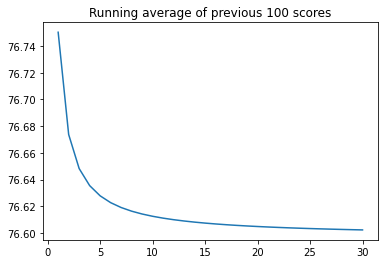

In [18]:
environmentG1=environmentGroups(fileData_chameleon.get_grouped_df(),fileData_chameleon.group_keys[9:10],0)
env=NetEnvironment(environmentG1,fileData_chameleon.group_keys[9:10])

print(env.observation_space.shape[0])
print(env.action_space.n)
print("#################")
env.reset()
t = time.time()
N = 20
batch_size = 5
n_epochs = 4
alpha = 0.0003
agent = PpoAgent(n_actions=env.action_space.n, batch_size=batch_size, 
                alpha=alpha, n_epochs=n_epochs, 
                input_dims=env.observation_space.shape)
n_games = 30
WRITER=SummaryWriter('runs/PPO_'+str(time.strftime("%H_%M_%S",time.localtime())))
figure_file = 'plots/env_file.png'

score_history = []

learn_iters = 0
avg_score = 0
n_steps = 0

for i in range(n_games):
    observation = env.reset()
    done = False
    score = 0
    WRITER.add_histogram("actor_layer_0", agent.actor.actor[0].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("actor_layer_1", agent.actor.actor[2].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("actor_layer_2", agent.actor.actor[4].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("critic_layer_0", agent.critic.critic[0].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("critic_layer_1", agent.critic.critic[2].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_histogram("critic_layer_2", agent.critic.critic[4].weight.flatten(), global_step=i, bins='tensorflow')
    WRITER.add_scalar("actor_loss", agent.actor_loss, i)
    WRITER.add_scalar("critic_loss", agent.critic_loss, i)
    WRITER.add_scalar("total_loss", agent.total_loss, i)
    while not done:
        action, prob, val = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        n_steps += 1
        score += reward
        agent.remember(observation, action, prob, val, reward, done)
        if n_steps % N == 0:
            agent.learn()
            learn_iters += 1
        observation = observation_
    score_history.append(score)
    WRITER.add_scalar("score", score, i)
    avg_score = np.mean(score_history[-100:])

    print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
            'time_steps', n_steps, 'learning_steps', learn_iters)
x = [i+1 for i in range(len(score_history))]
plot_learning_curve(x, score_history, figure_file)
print(f"training up time is {time.time()- t} seconds")

In [22]:
done = False
state = env.reset()
scores = []
action_list=[]
import tqdm
for _ in tqdm.notebook.tqdm(range(10)):
    observation = env.reset()
    done = False
    score = 0
    actions=[]
    while not done:
        action, prob, val = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        actions.append(action)
        score += reward
        observation = observation_
    scores.append(score)
    action_list.append(actions)
env.close()
print("Mean score",np.array(scores).mean())
print("Actual scores", scores)
print("actions", action_list)

  0%|          | 0/10 [00:00<?, ?it/s]

Mean score 321.8
Actual scores [323.0, 326.0, 345.0, 297.0, 337.0, 352.0, 296.0, 306.0, 326.0, 310.0]
actions [[1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 